In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# define constants
gamma = 5/3        # adiabatic constant for ideal monatomic gas
mu = 1.22           # mean molecular weight including a helium mass fraction 0.24
k_B = 1.380649E-23  # boltzmann constant in m^2 kg s^-2 K^-1
m_H = 1.66E-27      # mass of hydrogen atom in kg
Lambda = 0.05       # eaccretion eigenvalue

In [4]:
# set the figure size
plt.rcParams['figure.figsize'] = [7, 5]

In [5]:
# Read thermal history data
redshift_digitizer, temperature_digitizer = np.loadtxt('./thermal_history.csv', delimiter=', ', unpack=True)
# define the data point of plot
redshift = np.logspace(0, 3, 3000)
temperature = np.interp(redshift, redshift_digitizer, temperature_digitizer)

<Figure size 504x360 with 0 Axes>

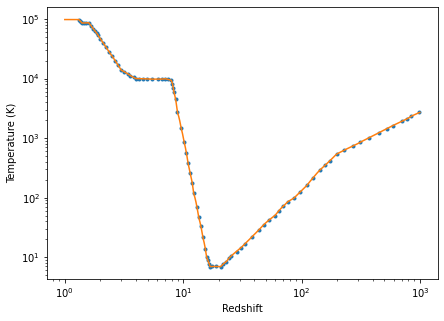

In [6]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_yscale('log')
axes.set_xscale('log')
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'Temperature (K)')
# thermal history data points from digitizer
axes.plot(redshift_digitizer, temperature_digitizer, '.')
axes.plot(redshift, temperature)

<Figure size 504x360 with 0 Axes>

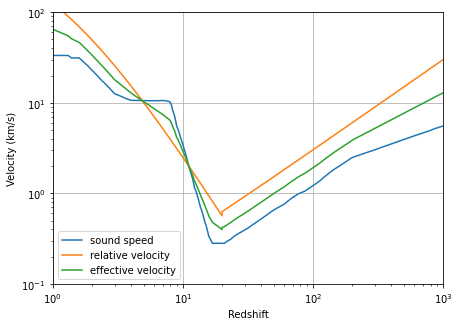

In [7]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_yscale('log')
axes.set_ylim([0.1, 100])
axes.set_xscale('log')
axes.set_xlim([1, 1000])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'Velocity (km/s)')

# calculation of variables
# sound speed in km/s
# relative speed in km/s
# effective velocity in km/s
sound_speed = np.sqrt(gamma*k_B*temperature/mu/m_H) / 1000
relative_speed = np.piecewise(redshift, [redshift >= 20, redshift < 20], [lambda z: 30/1000*(1+z), lambda z: 620*(1+z)**-2.3])
effective_velocity = np.sqrt(sound_speed*relative_speed)

# effective velocity plot
axes.plot(redshift, sound_speed, label='sound speed')
axes.plot(redshift, relative_speed, label='relative velocity')
axes.plot(redshift, effective_velocity, label='effective velocity')

axes.grid()
axes.legend()

<Figure size 504x360 with 0 Axes>

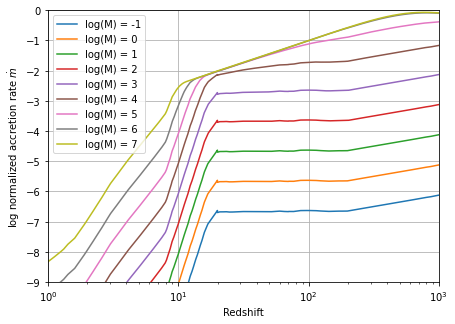

In [8]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
axes.set_ylim([-9, 0])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log normalized accretion rate $\dot{m}$ ')

# variables for calculating accretion eigenvalue
def Bondi_radius(M):    # in cm
    return 1.34E16*(M)*np.power(effective_velocity, -2)
def beta(M):
    t_cr = Bondi_radius(M)/100/1000/effective_velocity  #in s
    x_e = 5E-3
    Hubble_rate = 3.24E-18*np.sqrt(0.127)*np.power(1+redshift, 3/2) #in s^-1
    effective_viscosity = Hubble_rate   *(1+1.78*x_e*np.power((1+redshift)/100, 5/2))
    return effective_viscosity*t_cr

# accretion eigenvalue in eq. 9 for small viscosity
def lambda_0(M):
    gamma = 1.66
    xi = 0.75*np.power((gamma+1)/(5-3*gamma), (gamma-1)/(gamma+1))
    def cs_cr(beta):
        cs_cr_0 = np.sqrt(2/(5-3*gamma))
        return (3*cs_cr_0+beta**xi)/(3+beta**xi)
    x_cr = np.power(cs_cr(beta(M)), -2)*(-1+np.sqrt(1+beta(M)*np.power(cs_cr(beta(M)), -3)))/(beta(M)*cs_cr(beta(M))**-3)
    return np.exp(9/2/(3+np.power(beta(M), 0.75)))*x_cr**2
# accretion eigenvalue form eq. 8 and 10 (more accurate)
def lambda_1(M):
    gamma = 1.1 # isothermal
    xi = 0.75*np.power((gamma+1)/(5-3*gamma), (gamma-1)/(gamma+1))
    def cs_cr(beta):
        cs_cr_0 = np.sqrt(2/(5-3*gamma))
        return (3*cs_cr_0+beta**xi)/(3+beta**xi)
    x_cr = np.power(cs_cr(beta(M)), -2)*(-1+np.sqrt(1+beta(M)*np.power(cs_cr(beta(M)), -3)))/(beta(M)*cs_cr(beta(M))**-3)

    scale = 1/4*cs_cr(0)**((gamma+1)/(gamma-1)-4)
    return np.power(cs_cr(beta(M)), (gamma+1)/(gamma-1))*x_cr**2/scale*0.05

# calculation of accretion rate
def accretion_rate(M):
    return lambda_1(M)*0.321*(((1+redshift)/1000)**3)*(M)*effective_velocity**-3
# accretion rate plot
for i in range(-1, 8):
    axes.plot(redshift, np.log10(accretion_rate(10**i)), label=f'log(M) = {i}')
axes.grid()
axes.legend()

<Figure size 504x360 with 0 Axes>

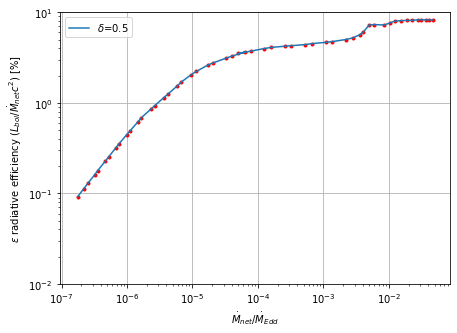

In [9]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
# axes.set_xlim([10**-6, 10**-1])
axes.set_yscale('log')
axes.set_ylim([0.01, 10])
axes.set_xlabel(r'$\dot{M}_{net}/\dot{M}_{Edd}$')
axes.set_ylabel(r'$\epsilon$ radiative efficiency $(L_{bol}/\dot{M}_{net}c^{2})$ [%]')

accretion_rate_digitizer, radiative_efficiency_digitizer = np.loadtxt(f'./radiative_efficiency_map_56.csv', delimiter=', ', unpack=True)
axes.plot(accretion_rate_digitizer, radiative_efficiency_digitizer, 'r.')
axes.plot(accretion_rate_digitizer, radiative_efficiency_digitizer, label=r'$\delta$=0.5')

axes.grid()
axes.legend()

<Figure size 504x360 with 0 Axes>

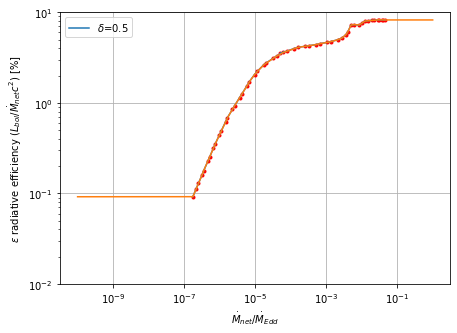

In [10]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
# axes.set_xlim([10**-6, 10**-1])
axes.set_yscale('log')
axes.set_ylim([0.01, 10])
axes.set_xlabel(r'$\dot{M}_{net}/\dot{M}_{Edd}$')
axes.set_ylabel(r'$\epsilon$ radiative efficiency $(L_{bol}/\dot{M}_{net}c^{2})$ [%]')

accretion_rate_digitizer, radiative_efficiency_digitizer = np.loadtxt(f'./radiative_efficiency_map_56.csv', delimiter=', ', unpack=True)
axes.plot(accretion_rate_digitizer, radiative_efficiency_digitizer, 'r.')
axes.plot(accretion_rate_digitizer, radiative_efficiency_digitizer, label=r'$\delta$=0.5')
grid = np.logspace(-10, 0, 2000)
axes.plot(grid, np.interp(grid, accretion_rate_digitizer, radiative_efficiency_digitizer))

axes.grid()
axes.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 504x360 with 0 Axes>

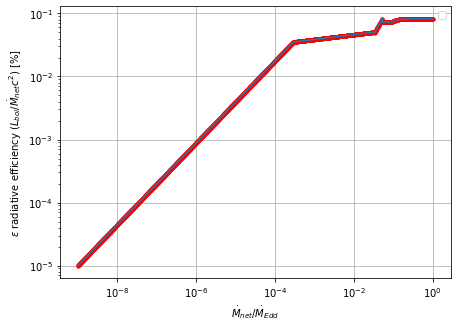

In [11]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
# axes.set_xlim([10**-7, 10**-1])
axes.set_yscale('log')
# axes.set_ylim([0.01, 10])
axes.set_xlabel(r'$\dot{M}_{net}/\dot{M}_{Edd}$')
axes.set_ylabel(r'$\epsilon$ radiative efficiency $(L_{bol}/\dot{M}_{net}c^{2})$ [%]')

# try to plot piecewise radiative efficiency power law for delta = 0.5
accretion_rate_grid = np.logspace(-9, 0, 2000)
def radiative_efficiency_grid(m_dot):
    alpha = 0.1
    m = m_dot*0.1*0.1/alpha
    cond = [
        m <= 2.9E-5,
        ((2.9E-5 < m) & (m < 3.3E-3)),
        ((3.3E-3 < m) & (m < 5.3E-3)),
        m > 5.3E-3,
    ]
    func = [
        lambda m: 1.58*np.sqrt(alpha/0.1)*np.power(m*100, 0.65),
        lambda m: 0.055*np.sqrt(alpha/0.1)*np.power(m*100, 0.076),
        lambda m: 0.17*np.sqrt(alpha/0.1)*np.power(m*100, 1.12),
        lambda m: 0.01*np.interp(m, accretion_rate_digitizer, radiative_efficiency_digitizer)
    ]
    return np.piecewise(m, cond, func)
axes.plot(accretion_rate_grid, radiative_efficiency_grid(accretion_rate_grid), 'r.')
axes.plot(accretion_rate_grid, radiative_efficiency_grid(accretion_rate_grid))
# axes.plot(accretion_rate_grid, 0.01*np.interp(accretion_rate_grid*0.1, accretion_rate_digitizer, radiative_efficiency_digitizer))

axes.grid()
axes.legend()

<Figure size 504x360 with 0 Axes>

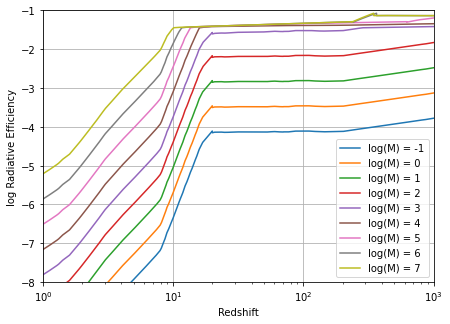

In [12]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
axes.set_ylim([-8, -1])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log Radiative Efficiency')

# define function for radiative efficiency
def radiative_efficiency(M):
    return 0.01*np.interp(accretion_rate(M)*10, accretion_rate_digitizer*10, 0.01*radiative_efficiency_digitizer)

for i in range(-1, 8):
    axes.plot(redshift, np.log10(radiative_efficiency_grid(0.1*accretion_rate(10**i))), label=f'log(M) = {i}')
axes.grid()
axes.legend()

<Figure size 504x360 with 0 Axes>

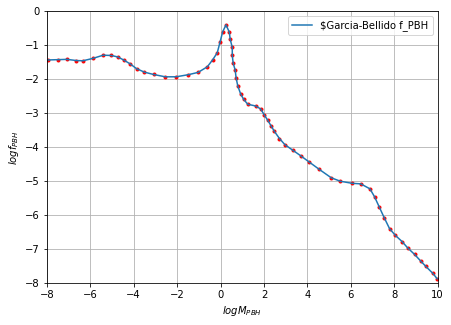

In [25]:
fig = plt.figure()
fig, axes = plt.subplots()
# axes.set_xscale('log')
axes.set_xlim([-8, 10])
# axes.set_yscale('log')
axes.set_ylim([-8, 0])
axes.set_xlabel(r'$log M_{PBH}$')
axes.set_ylabel(r'$log f_{PBH}$')

log_mass_digitizer, distribution_digitizer = np.loadtxt(f'./PBH_mass_spectrum.csv', delimiter=', ', unpack=True)
axes.plot(log_mass_digitizer, distribution_digitizer, 'r.')
axes.plot(log_mass_digitizer, distribution_digitizer, label=r'$Garcia-Bellido f_PBH')

# define density of each M
def density(M):
    return 10**np.interp(M, log_mass_digitizer, distribution_digitizer)/10**i

axes.grid()
axes.legend()

<Figure size 504x360 with 0 Axes>

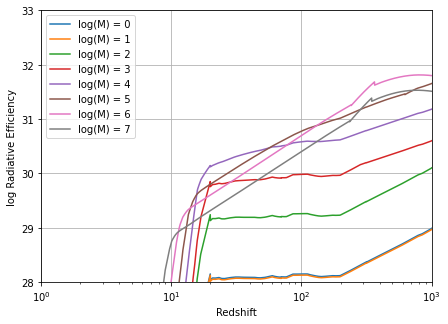

In [29]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
axes.set_ylim([28, 33])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log Radiative Efficiency')

# eddington luminosity in erg/s
def Eddington_luminosity(M):
    return 1.26E38*M
def luminosity(log_M):
    return density(log_M)*Eddington_luminosity(10**log_M)*accretion_rate(10**log_M)*radiative_efficiency_grid(0.1*accretion_rate(10**log_M))

for i in range(0, 8):
    axes.plot(redshift, np.log10(luminosity(i)), label=f'log(M) = {i}')
axes.grid()
axes.legend()

<Figure size 504x360 with 0 Axes>

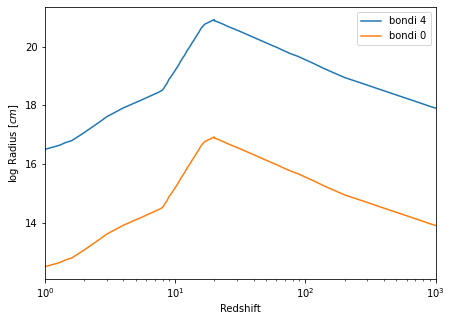

In [14]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
# axes.set_ylim([-9, 0])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log Radius $[cm]$ ')

axes.plot(redshift, np.log10(Bondi_radius(10**4)), label='bondi 4')
axes.plot(redshift, np.log10(Bondi_radius(1)), label='bondi 0')

axes.legend()